In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
regions = ['africa','europe','north_america_australia','west_asia']
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],'europe':['Denmark','UK','Finland'],'north_america_australia':['Australia','Canada','USA'],'west_asia':['Malaysia','Philippines','Singapore']}
clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']
topic = clusters[0] # 0 1 2 3 4 5 6
region = regions[0] # 0 1 2 3 
country = countries[region][0] # 0 1 2
total_days_number = 160


In [22]:
#--------general labels with relative traffic rate--------#
# path = f'./output/regions/europe/genral_labeled_data_with_relative_traffic_rates/{country}_with_relative_traffic_rates.csv'
path = f'./output/regions/{region}/genral_labeled_data_with_relative_traffic_rates/{topic}/{country}_with_relative_traffic_rates.csv'

data = pd.read_csv(path)

df = data[['date','general_label','traffic_rate']]

df


,date,general_label,traffic_rate
0,2016-11-28,Economy,0.0
1,2016-11-29,Economy,0.0
2,2016-11-30,Economy,0.0
3,2016-12-01,Economy,0.0
4,2016-12-02,Economy,0.0
...,...,...,...
153,2017-04-30,Economy,0.0
154,2017-05-01,Economy,0.0
155,2017-05-02,Economy,0.0
156,2017-05-03,Economy,0.0


empty_days:  date             158
general_label    158
traffic_rate     158
dtype: int64


C:\Users\alkrd\AppData\Local\Temp\ipykernel_1708\865158678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


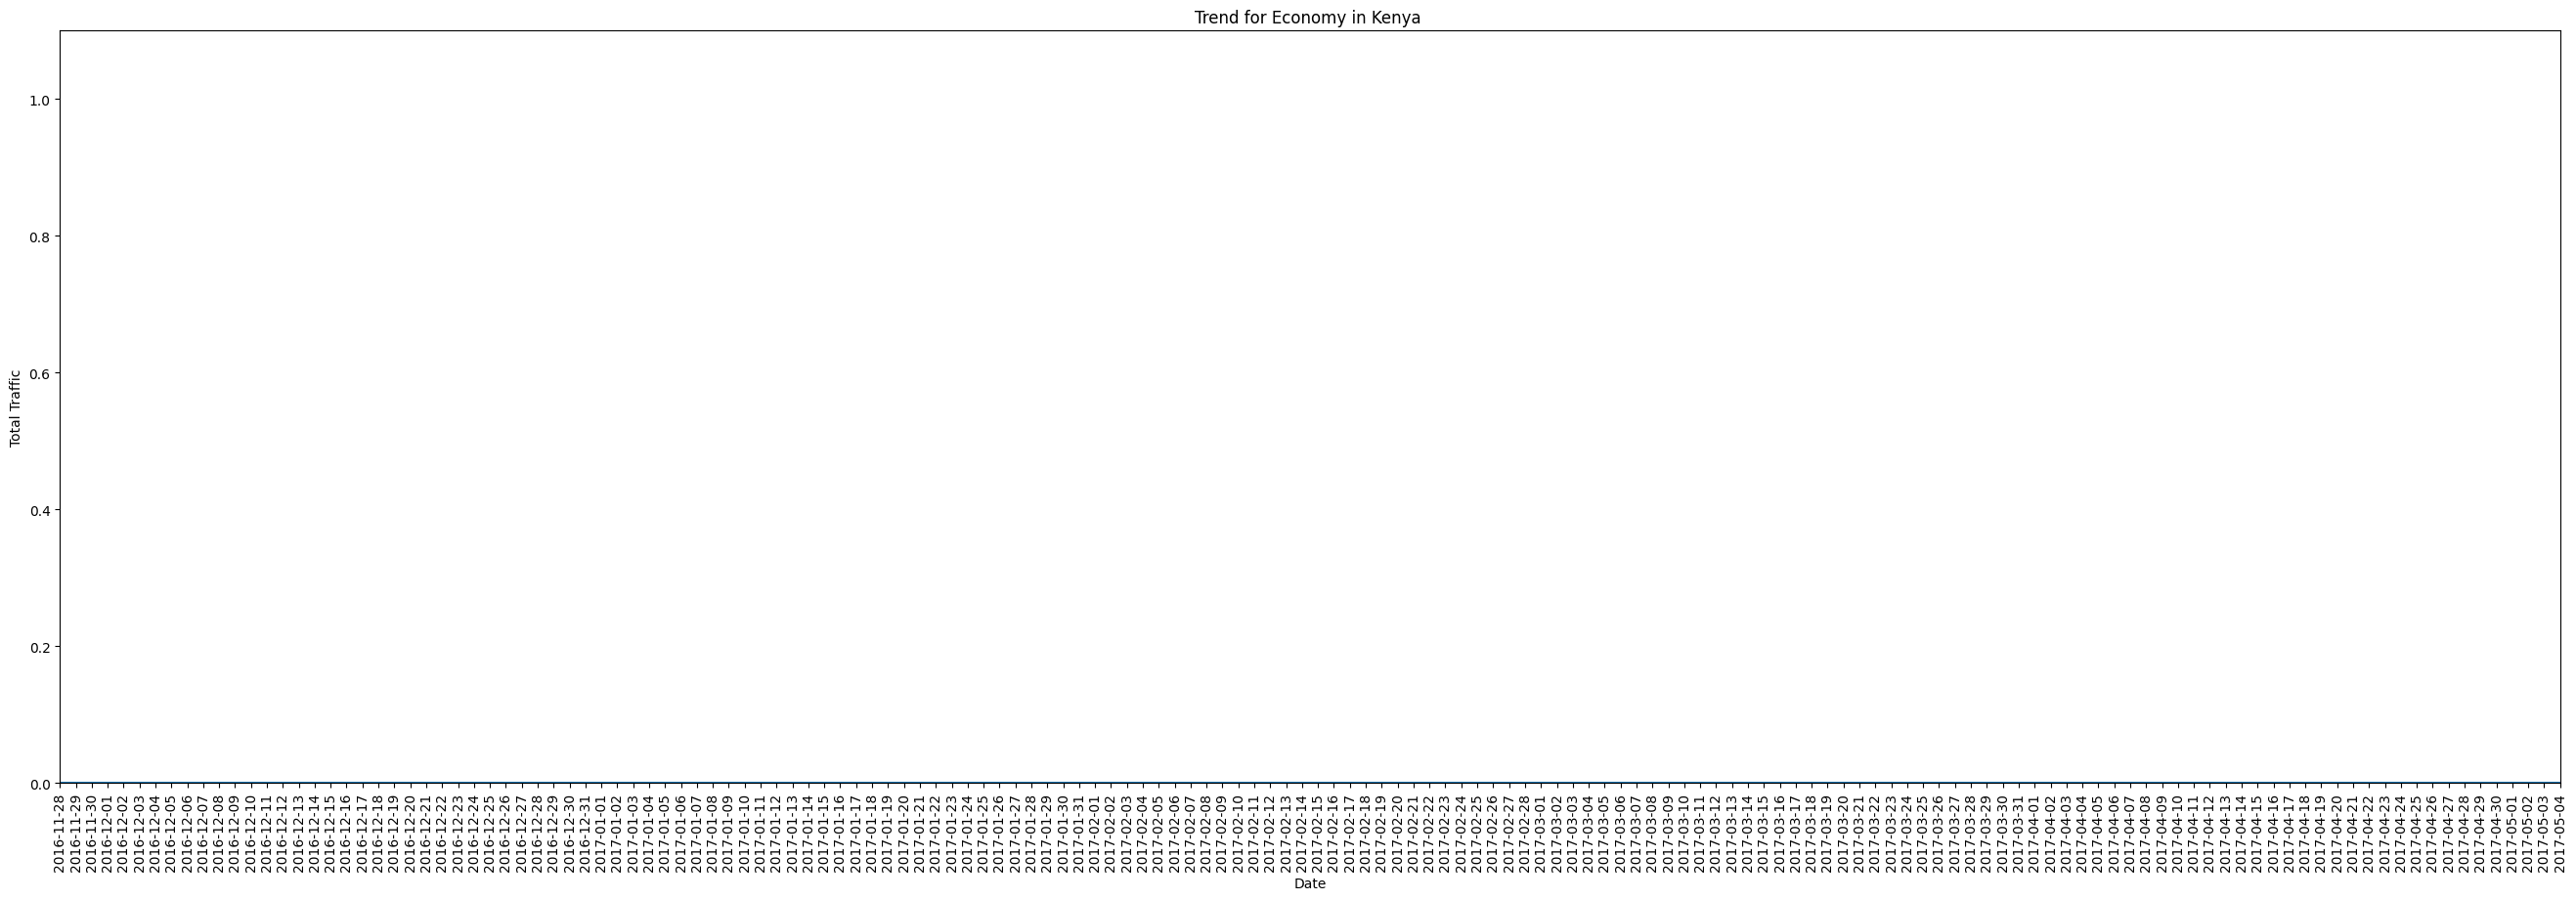

In [23]:
empty_days = df[df['traffic_rate'] == 0.0].count()
occurance_days_number = total_days_number - empty_days
print("empty_days: ", empty_days)

df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(33, 10))
sns.lineplot(data=df, x='date', y='traffic_rate')
plt.title(f"Trend for {df['general_label'][0]} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(df['date'], rotation=90)

plt.ylim(0, 1.1)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()